In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, time, datetime

In [2]:
drivers = pd.read_csv("Formula1-DatasetFull/raw_data/drivers.csv")
lap_times = pd.read_csv("Formula1-DatasetFull/raw_data/lap_times.csv")
results = pd.read_csv("Formula1-DatasetFull/raw_data/results.csv")
constructor_results = pd.read_csv("Formula1-DatasetFull/raw_data/constructor_results.csv")
constructors = pd.read_csv("Formula1-DatasetFull/raw_data/constructors.csv")
driver_standings = pd.read_csv("Formula1-DatasetFull/raw_data/driver_standings.csv")
qualifying = pd.read_csv("Formula1-DatasetFull/raw_data/qualifying.csv")
pit_stops = pd.read_csv("Formula1-DatasetFull/raw_data/pit_stops.csv")
races = pd.read_csv("Formula1-DatasetFull/raw_data/races.csv")

Text(0.5, 1.0, 'nationality of consturctors')

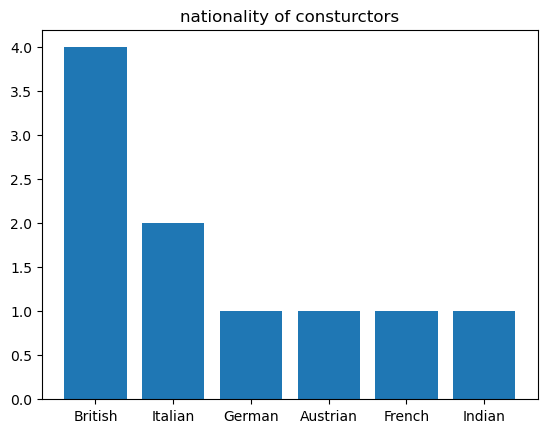

In [4]:
#constructor with the most points

constructor_points = results.groupby("constructorId").agg(total_points = ("points", "sum"))
constructor_points

df_constructors = pd.DataFrame(constructors)
names = df_constructors[["constructorId", "name", "nationality"]]
names.groupby("constructorId")
result_df = pd.merge(names, constructor_points, on='constructorId', how='left')
top_10_points_for_constructors = result_df.sort_values(by = "total_points", ascending = False).head(10)

nation_count = top_10_points_for_constructors["nationality"].value_counts()
plt.bar(nation_count.index, nation_count)
plt.title("nationality of consturctors")





Text(0.5, 1.0, 'countries with most drivers')

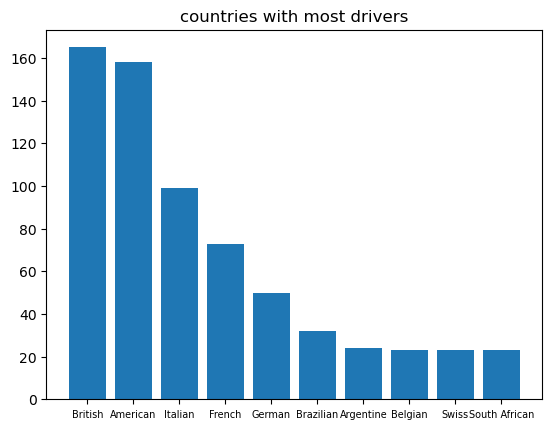

In [5]:
# countries with the most drivers

drivers["nationality"].value_counts().head(10)
countries_with_most_drivers_top10 = drivers["nationality"].value_counts().head(10)
countries_with_most_drivers_top10
plt.bar(countries_with_most_drivers_top10.index, countries_with_most_drivers_top10)
plt.xticks(fontsize = 7)
plt.title("countries with most drivers")

<BarContainer object of 5 artists>

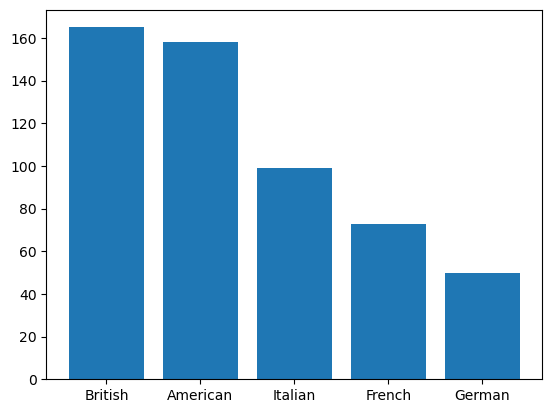

In [97]:
# nationality of drivers

df_drivers = pd.DataFrame(drivers)
driver_nationality = df_drivers[["driverId", "nationality"]]
nationality_count = drivers["nationality"].value_counts().head(5)
plt.bar(nationality_count.index, nationality_count)


In [140]:
lap_times.groupby("driverId").agg()

In [109]:
df_pit_stops = pd.DataFrame(pit_stops)
df_pit_stops
df_pit_stops["duration"] = pd.to_numeric(df_pit_stops["duration"], errors='coerce')
mean_duration = df_pit_stops.groupby("driverId").agg(duration_mean = ("duration", "mean"))
duration_mean_by_order = mean_duration.sort_values(by = "duration_mean", ascending = False)
duration_mean_by_order

results_df = pd.merge(driver_nationality, duration_mean_by_order, on='driverId', how='left')


In [9]:
# Grid position doesn't really affect the results of the race

df_results = pd.DataFrame(results)
df_results["milliseconds"] = pd.to_numeric(df_results["milliseconds"], errors='coerce')


avg_milliseconds = df_results.groupby("driverId").agg(avg_milliseconds = ("milliseconds", "mean"))
drivers_avg_milliseconds = pd.merge(driver_nationality, avg_milliseconds, on = "driverId", how = "left")
drivers_avg_milliseconds.sort_values(by = "avg_milliseconds", ascending = True)



,avg_milliseconds
grid,
0,4.650388e+06
11,5.951327e+06
12,6.043669e+06
13,6.103187e+06
5,6.118219e+06
8,6.126864e+06
18,6.130334e+06
9,6.133027e+06
6,6.150706e+06


In [130]:
df_races = pd.DataFrame(races)
races_date = df_races.sort_values(by = "date", ascending = True)[["raceId","date"]]
milliseconds_by_date = pd.merge(drivers_avg_milliseconds, races_date, on="raceId", how="left")
milliseconds_by_date

,driverId,nationality,avg_milliseconds,raceId,date
0,1,British,5.849188e+06,18,2008-03-16
1,2,German,5.675288e+06,18,2008-03-16
2,3,German,5.900714e+06,18,2008-03-16
3,4,Spanish,5.856561e+06,18,2008-03-16
4,5,Finnish,5.855633e+06,18,2008-03-16
...,...,...,...,...,...
852,854,German,6.038058e+06,58,2006-05-14
853,855,Chinese,6.125204e+06,58,2006-05-14
854,856,Dutch,4.834633e+06,58,2006-05-14
855,857,Australian,NaN,58,2006-05-14
